In [1]:
# Import Relevant Libraries

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data for Analysis

In [2]:
# Read data into a DataFrame
# To run on your local machine, place jupyter notebook in same directory as csv
sorted_GAD_7_df = pd.read_csv("phq_all_final.csv")

In [3]:
# Inspect import
sorted_GAD_7_df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [4]:
sorted_GAD_7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
date                    53698 non-null object
patient_id              53698 non-null int64
type                    53698 non-null object
patient_date_created    53698 non-null object
score                   53698 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [59]:
# Convert DateTime string to DateTime type
sorted_GAD_7_df['patient_date_created'] = pd.to_datetime(sorted_GAD_7_df['patient_date_created'])
sorted_GAD_7_df['date'] = pd.to_datetime(sorted_GAD_7_df['date'])

# Add a counter for every test per patient
sorted_GAD_7_df['counter'] = sorted_GAD_7_df.groupby(['patient_id']).cumcount() + 1

# Calculate date between patient created and gad7 results
sorted_GAD_7_df['current_gad7_date'] = sorted_GAD_7_df['date']
sorted_GAD_7_df['previous_gad7_date'] = sorted_GAD_7_df['date'].shift(1) 
sorted_GAD_7_df['time_lapse_gad7_date'] = sorted_GAD_7_df['current_gad7_date'] - sorted_GAD_7_df['previous_gad7_date']
sorted_GAD_7_df['time_lapse_creation_to_gad7'] = sorted_GAD_7_df['current_gad7_date'] - sorted_GAD_7_df['patient_date_created']
mask_initial_gad7_date = sorted_GAD_7_df['counter'] == 1
sorted_GAD_7_df.loc[sorted_GAD_7_df.counter == 1, 'time_lapse_gad7_date'] = np.NaN
sorted_GAD_7_df[mask_initial_gad7_date].time_lapse_gad7_date = np.nan
sorted_GAD_7_df = sorted_GAD_7_df.drop(columns = ["current_gad7_date", "previous_gad7_date"])
sorted_GAD_7_df['time_lapse_gad7_date'] = sorted_GAD_7_df['time_lapse_gad7_date'].fillna(0)

sorted_GAD_7_df.head(10)

In [23]:
patient_GAD_7_df = GAD_7_df.groupby('patient_id')["date"].nunique()
patient_GAD_7_df.sort_values(ascending=False)

patient_id
10687    84
6574     42
12307    38
13855    34
13874    34
         ..
7155      1
7156      1
15942     1
15941     1
16076     1
Name: date, Length: 15502, dtype: int64

In [45]:
patient_max = GAD_7_df[GAD_7_df["patient_id"]==10687]
patient_max 

,date,patient_id,type,patient_date_created,score
572,2019-06-18T13:18:43.179145,10687,gad7,2019-06-12T16:32:01.993418,13
573,2019-06-20T06:01:13.569266,10687,gad7,2019-06-12T16:32:01.993418,12
574,2019-06-22T13:32:11.049223,10687,gad7,2019-06-12T16:32:01.993418,14
575,2019-06-24T06:07:19.92038,10687,gad7,2019-06-12T16:32:01.993418,15
576,2019-06-26T05:54:12.661853,10687,gad7,2019-06-12T16:32:01.993418,9
...,...,...,...,...,...
651,2019-11-21T10:32:27.447941,10687,gad7,2019-06-12T16:32:01.993418,18
652,2019-11-21T10:32:46.771491,10687,gad7,2019-06-12T16:32:01.993418,18
653,2019-11-25T10:52:01.14159,10687,gad7,2019-06-12T16:32:01.993418,20
654,2019-11-27T10:40:38.992561,10687,gad7,2019-06-12T16:32:01.993418,20


(0, 88.15)

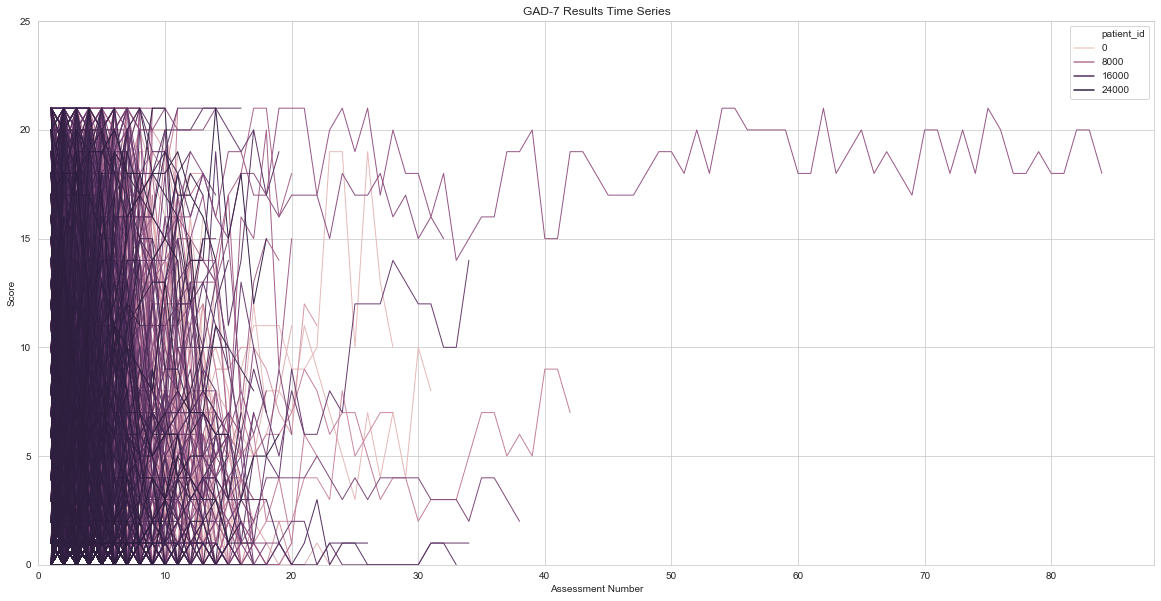

In [188]:
plt.figure(figsize=(20,10))
plotme = sns.lineplot(x='counter', y='score',
                  estimator=None, lw=1, hue ='patient_id',
                  data=sorted_GAD_7_df).set(title = 'GAD-7 Results Time Series', xlabel='Assessment Number', ylabel='Score', yticks = [0, 5, 10, 15, 20, 25])

# control x and y limits
plt.ylim(0, 25)
plt.xlim(0, None)

## EDA: Understand distribution of number of GAD-7 Results per patient

TypeError: 'AxesSubplot' object is not iterable

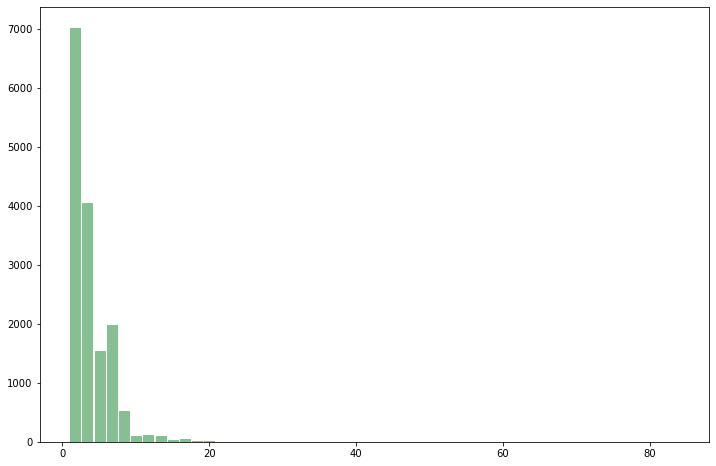

In [119]:
ax = patient_GAD_7_df.hist(bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## EDA: Understand distribution of number of days between GAD-7 Results

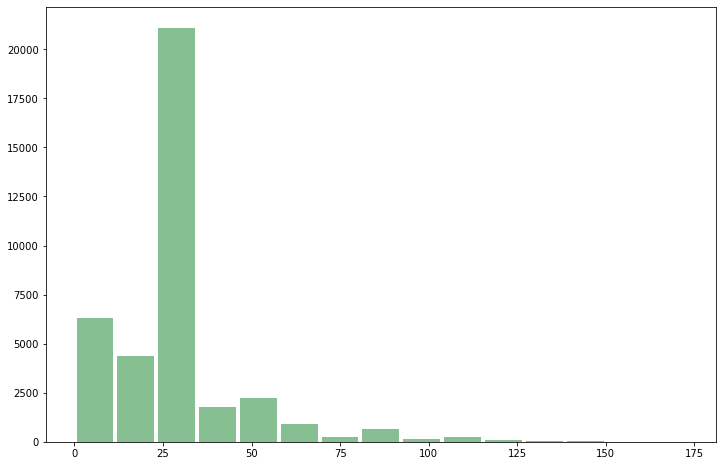

In [120]:
# Convert timedelta to integer
sorted_GAD_7_df["time_lapse_gad7_date"] = pd.to_numeric(sorted_GAD_7_df["time_lapse_gad7_date"].dt.days, downcast='integer')

# Isolate df of time lapse between gad7 dates
time_lapse_gad7_admin_hist_df = sorted_GAD_7_df["time_lapse_gad7_date"]
time_lapse_gad7_admin_hist_df = time_lapse_gad7_admin_hist_df.dropna()

# Plot histogram of time lapse between gad7 dates
ax = time_lapse_gad7_admin_hist_df.hist(bins=15, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

## EDA: Understand distribution of number of days between patient creation and initial GAD-7 Results

In [109]:
creation_iso_df

21758     27.0
31249     74.0
47485     32.0
44304    112.0
51950     27.0
         ...  
35421     48.0
52718     13.0
26163      0.0
48415     82.0
11876     27.0
Name: time_lapse_creation_to_gad7, Length: 15502, dtype: float64

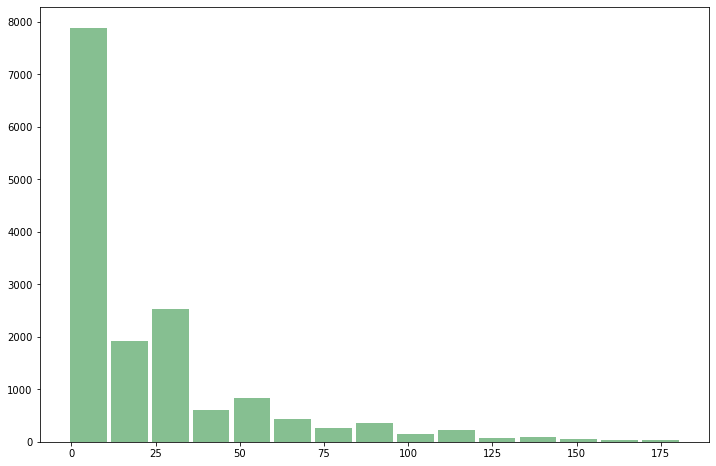

In [114]:
# Plot histogram of time lapse between gad7 dates
ax = creation_iso_df.hist(bins=15, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)